# 06 - Clasificacion con Bayes

In [31]:
from os import O_TRUNC
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
from IPython.display import Image

import prediccion

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from statistics import mean

df = pd.DataFrame(pd.read_csv('mobile_price.csv'))


### Predicciones con el dataset original (Bayes)

In [32]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
algoPrediccion = prediccion.ClasificacionModelo(df)
algoPrediccion.clasificador =  GaussianNB()
algoPrediccion.df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.20,0,1,0,7,0.60,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.50,1,0,1,53,0.70,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.50,1,2,1,41,0.90,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.50,0,0,0,10,0.80,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.20,0,13,1,44,0.60,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.50,1,0,1,2,0.80,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.60,1,0,0,39,0.20,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.90,1,1,1,36,0.70,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.90,0,4,1,46,0.10,145,5,...,336,670,869,18,10,19,1,1,1,0


In [33]:
algoPrediccion.realizarEntrenamientoCompleto('price_range')

shape X_train (1600, 17)
shape X_test (400, 17)
shape y_train (1600, 1)
shape y_test (400, 1)


In [34]:
algoPrediccion.resultadoDeEntrenamiento()

,Actual,Prediccion,Error Absoluto,Error porcentual absoluto %
0,3,3,0,0.00
1,0,0,0,0.00
2,2,2,0,0.00
3,2,1,1,50.00
4,2,3,1,50.00
...,...,...,...,...
395,1,1,0,0.00
396,1,1,0,0.00
397,0,0,0,0.00
398,2,2,0,0.00


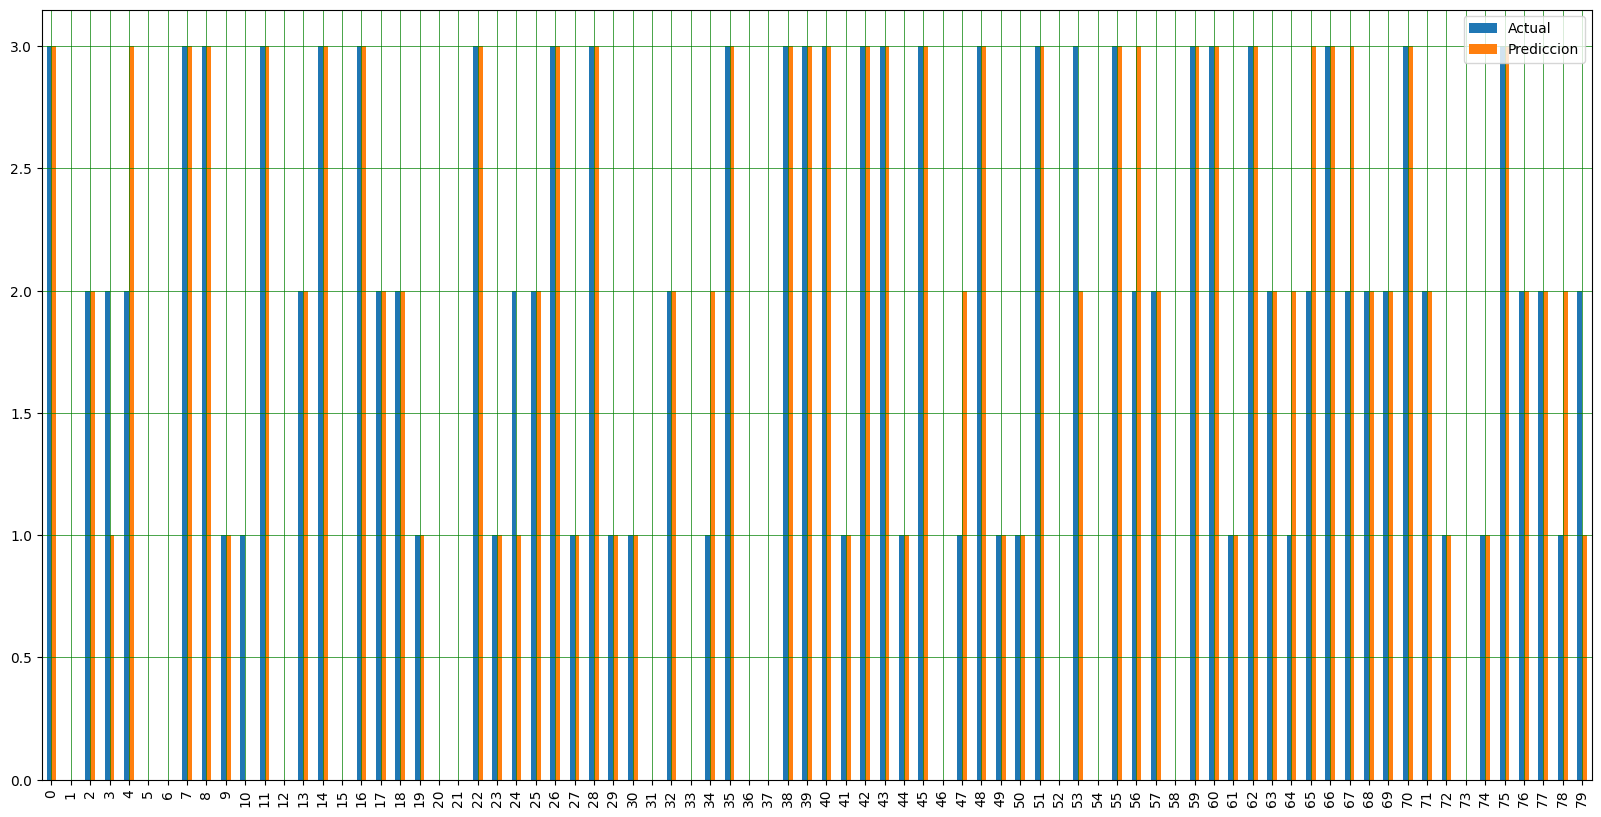

In [35]:
algoPrediccion.graficoComparativoBarras()

A simple vista se pueden ver que el algoritmo ha errado en varios casos aunque en general son aquellos en donde el rango de precios son  1 o 2. Para los rangos de precios igual a cero las predicciones han sido bastante acertadas segun el grafico

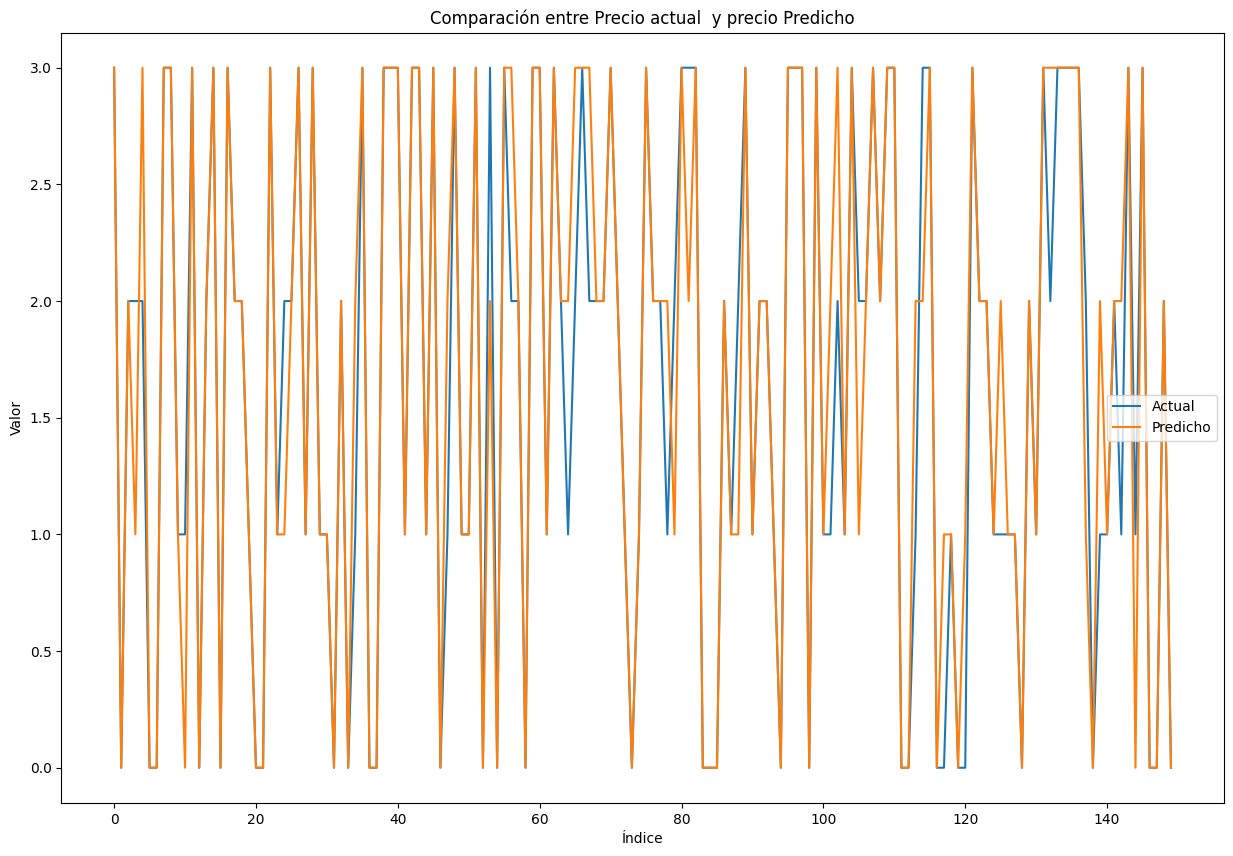

In [36]:
algoPrediccion.graficoComparativoLineas()

[[ 90   5   0   0]
 [  5  67  20   0]
 [  0  16  67  16]
 [  0   0   9 105]]


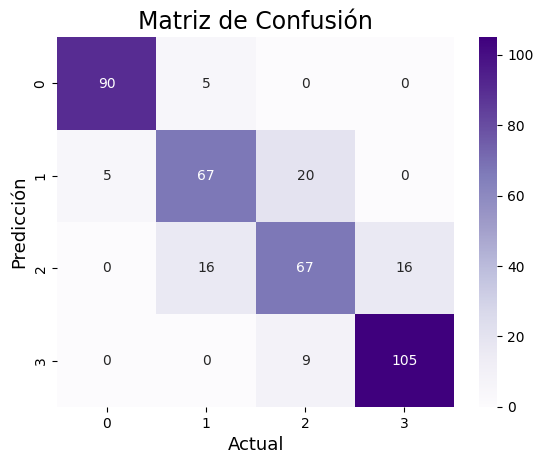

In [37]:
algoPrediccion.graficoMatrizDeConfusion()

In [38]:
algoPrediccion.metricas()

              precision    recall  f1-score   support

           0     0.9474    0.9474    0.9474        95
           1     0.7614    0.7283    0.7444        92
           2     0.6979    0.6768    0.6872        99
           3     0.8678    0.9211    0.8936       114

    accuracy                         0.8225       400
   macro avg     0.8186    0.8184    0.8182       400
weighted avg     0.8202    0.8225    0.8210       400



Hasta ahora luego del KNN es el algoritmo que peor resultado nos da como podemos ver. Dandonos una efectividad de 82% superando por poco al 81.5% del KNN pero siendo peor que el resto  de los algoritmos. Aun asi no son resultados tan malos (bajo mi criterio todo algoritmo por arriba del 70% es bueno ,pero cuanto mas cercando al 100 mejor) . Por ultimo observemos que la tasa de error para los rangos de precios 2 es bastante mala ,diria la peor si mal no me equivoco. Si tuvieramos que armar  limpiar los datos exclusivamente para este algoritmo  efectivamente tendriamos que hacer foco en los rangos de precios 2 principalmente .

<hr>

### Predicciones con el dataset "limpiado" (Bayes)

In [39]:

df_limpio = pd.DataFrame(pd.read_csv('mobile_price_limpiado.csv'))


In [40]:
algoPrediccion2 = prediccion.ClasificacionModelo(df_limpio)
algoPrediccion2.clasificador =  GaussianNB()
algoPrediccion2.realizarEntrenamientoCompleto('price_range')

shape X_train (1408, 17)
shape X_test (353, 17)
shape y_train (1408, 1)
shape y_test (353, 1)


In [41]:
algoPrediccion2.metricas()

              precision    recall  f1-score   support

           0     0.8980    0.9072    0.9026        97
           1     0.7447    0.7216    0.7330        97
           2     0.6552    0.7037    0.6786        81
           3     0.8784    0.8333    0.8553        78

    accuracy                         0.7932       353
   macro avg     0.7940    0.7915    0.7923       353
weighted avg     0.7958    0.7932    0.7941       353



Aca tambien empeoramos los resultados con el dataset limpiado. Como ya estamos viendo luego de realizar varias pruebas ,el dataset limpio originalmente probado para la regresion logistica no esta dando los mejores resultados en el resto de algoritmos si no que los empeora

<hr><hr>